## Contingency tables help us find the relationship between two discrete variables. Say for example we consider the smoking habits of males and females. We collect information like the following:

|        | Smoker | Non-Smoker |     |
| ------ | ------ | ---------- | --- |  
| Male   | 60     | 40         | 100 |
| Female | 35     | 40         | 75  |
|        | 95     | 80         | 175 |


## We ask then: Is there a relationship between the row and column variables. i.e. are you more or less likely to be a smoker given that you are male?
## The Null hypothesis is that there is no relationship and the Alternate hypothesis is that there is some relationship (the alternate does not specify which kind of relationship, only that there is one).
## A more practical test would be something like 


|   Observed     | Operator1 | Operator2 | Operator3 |     |
|--------|-----------|-----------|-----------|-----|
| Shift1 | 22        | 26        | 23        | 71  |
| Shift2 | 28        | 62        | 26        | 116 |
| Shift3 | 72        | 22        | 66        | 160 |
|        | 122       | 110       | 115       | 347 |

## We would then ask: Is there a relationship between operator productivity and the shifts that they work?

## The test statistic is again chi squared. Calculated as 

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O-E)^2}{E}
$$

## The degrees of freedom is (rows - 1)*(cols - 1) 

## How do we calculate the expected outputs? We take the total production and assume that the total production is fractionally represented across each row.

|   Expected     | Operator1 | Operator2 | Operator3 |     |
|--------|-----------|-----------|-----------|-----|
| Shift1 | 71*122/347        | 71*115/347        | ...        | 71  |
| Shift2 | 116*122/347        | ...        | ...        | 116 |
| Shift3 | ...        | ...        | 160*115/347        | 160 |
|        | 122       | 110       | 115       | 347 |

## then it is much the same as calculating the sum of squared deviations from the expected as we had with contingency tables/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import scipy.stats as stats

In [3]:
# this is the operator shift example:

sh_op = np.array([
    [22, 26, 23],
    [28, 62, 26],
    [72, 22, 66]
])

In [5]:
stats.chi2_contingency(sh_op)

# returns (chi^2, p, df, expected)
# since p = 3.45e-10 < 0.05 we reject the null. I.e. there is a statistically significant relationship between operator productivity and the shifts they work

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

In [8]:
df = pd.DataFrame(data=sh_op, columns=["op1", "op2", "op3"], index=["shift1", "shift2", "shift3"])
#Total sum per column: 
df.loc['Total',:]= df.sum(axis=0)

#Total sum per row: 
df.loc[:,'Total'] = df.sum(axis=1)
df

,op1,op2,op3,Total
shift1,22.0,26.0,23.0,71.0
shift2,28.0,62.0,26.0,116.0
shift3,72.0,22.0,66.0,160.0
Total,122.0,110.0,115.0,347.0


In [12]:
# the inputs for this test are rather robust
stats.chi2_contingency(df)

(50.09315721064658,
 1.0346489535170875e-07,
 9,
 array([[ 24.96253602,  22.50720461,  23.53025937,  71.        ],
        [ 40.78386167,  36.77233429,  38.44380403, 116.        ],
        [ 56.25360231,  50.7204611 ,  53.0259366 , 160.        ],
        [122.        , 110.        , 115.        , 347.        ]]))

In [13]:
# lets take a look at the tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# does the percentage of smokers depend on the day?

tips.groupby(by=["day", "smoker"]).count()

total_bill  tip  sex  time  size
day  smoker                                  
Thur Yes             17   17   17    17    17
     No              45   45   45    45    45
Fri  Yes             15   15   15    15    15
     No               4    4    4     4     4
Sat  Yes             42   42   42    42    42
     No              45   45   45    45    45
Sun  Yes             19   19   19    19    19
     No              57   57   57    57    57

In [22]:
day_smokers = tips.pivot_table(index="day", columns="smoker", aggfunc="count")["tip"]
day_smokers

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


In [24]:
stats.chi2_contingency(day_smokers)
# null is rejected, i.e. there is a statistically significant difference in the proportion of smokers by day

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754, 38.36885246],
        [ 7.24180328, 11.75819672],
        [33.15983607, 53.84016393],
        [28.96721311, 47.03278689]]))

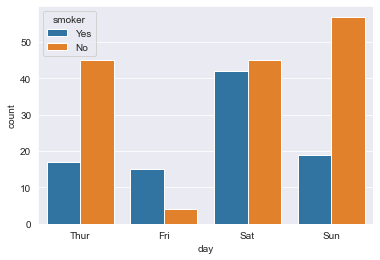

In [48]:
sns.countplot(data=tips, x="day", hue="smoker")
plt.show()